In [21]:
#https://github.com/UBC-MOAD/analysis_saurav_wcvi/blob/master/Final_Figures.ipynb

In [22]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [23]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import netCDF4 as nc; import arrow
import cmocean as cm
import gsw

In [24]:
SAL_JDF_stor = \
pickle.load(open('./pkls_pyscripts/SAL_JDF_stor.pkl', 'rb'))
TEMP_JDF_stor = \
pickle.load(open('./pkls_pyscripts/TEMP_JDF_stor.pkl', 'rb'))

dens_stor=gsw.rho(SAL_JDF_stor,TEMP_JDF_stor,0)
spic_stor = gsw.spiciness0(SAL_JDF_stor,TEMP_JDF_stor)

In [25]:
# axs[i].scatter(TEMP_JDF_stor[y,:,i], SAL_JDF_stor[y,:,i], c='k', \
#                           cmap = cm.cm.balance,\
#         s=35, vmin=-2.5, vmax=2.5)

In [26]:
# Figure out boudaries (mins and maxs)
smin = 28 #np.nanmin(model_sal_G)  - (0.01 * np.nanmin(model_sal_G))
smax = 35 #np.nanmax(model_sal_E)  + (0.01 * np.nanmax(model_sal_E))
tmin = 6 #np.nanmin(model_tem_E) - (0.1 * np.nanmax(model_tem_E))
tmax = 14 #np.nanmax(model_tem_E) + (0.1 * np.nanmax(model_tem_E))
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))
 
# Create empty grid of zeros
dens_1 = np.empty((ydim,xdim))
spic_1 = np.empty((ydim,xdim))
SA = np.empty((xdim))
CT = np.empty((ydim)) 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        
        SA[i] = si[i]
        CT[j] = ti[j]
        dens_1[j,i]=gsw.rho(SA[i],CT[j],0)
        spic_1[j,i] = gsw.spiciness0(SA[i],CT[j])
        
dens_1 = dens_1 - 1000

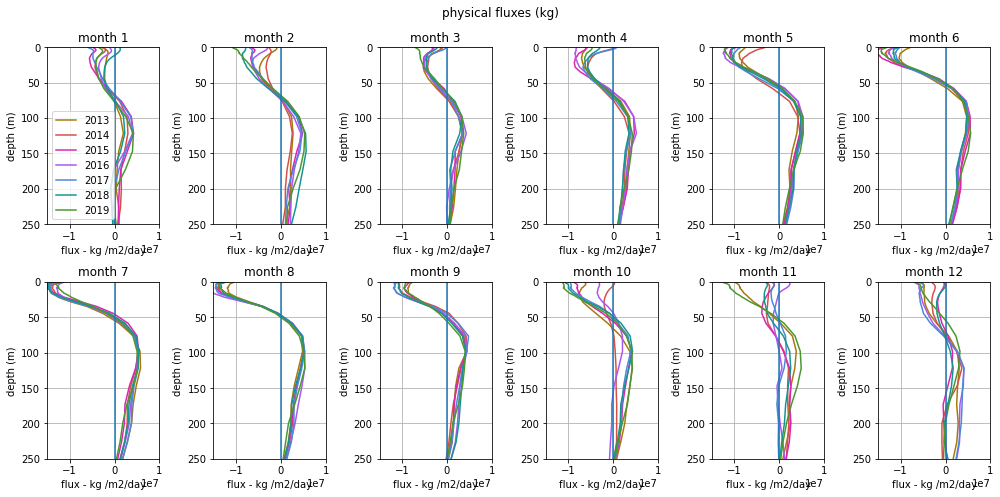

In [27]:
phys_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/phys_flux_stor_conc.pkl', 'rb'))  
sal_flux_stor_conc = \
pickle.load(open('./pkls_pyscripts/sal_flux_stor_conc.pkl', 'rb'))  


tcmap = cm.cm.phase
txmi = -1.5e7; txma =1e7
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(phys_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("flux - kg /m2/day")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('physical fluxes (kg)'); plt.tight_layout()


## salinity fluxes

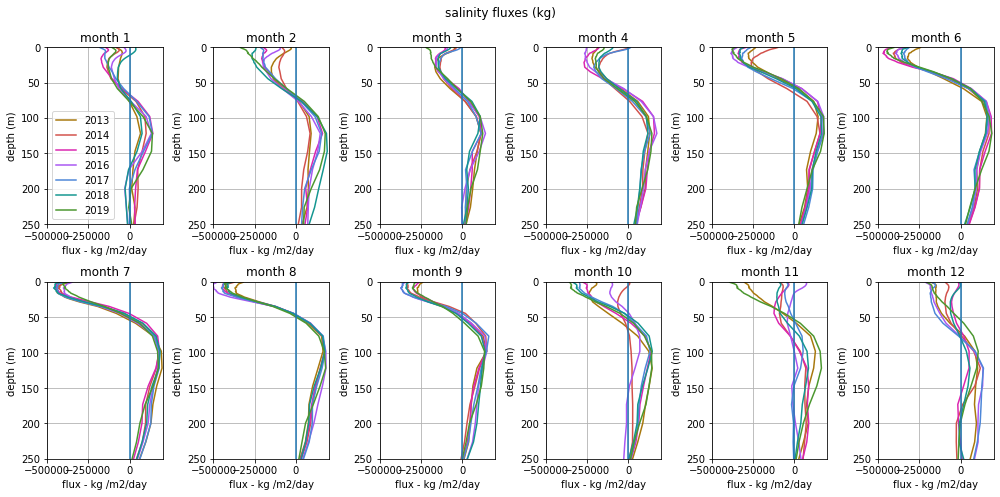

In [28]:
tcmap = cm.cm.phase
txmi = -5e5; txma =2e5
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(sal_flux_stor_conc[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("flux - kg /m2/day")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('salinity fluxes (kg)'); plt.tight_layout()

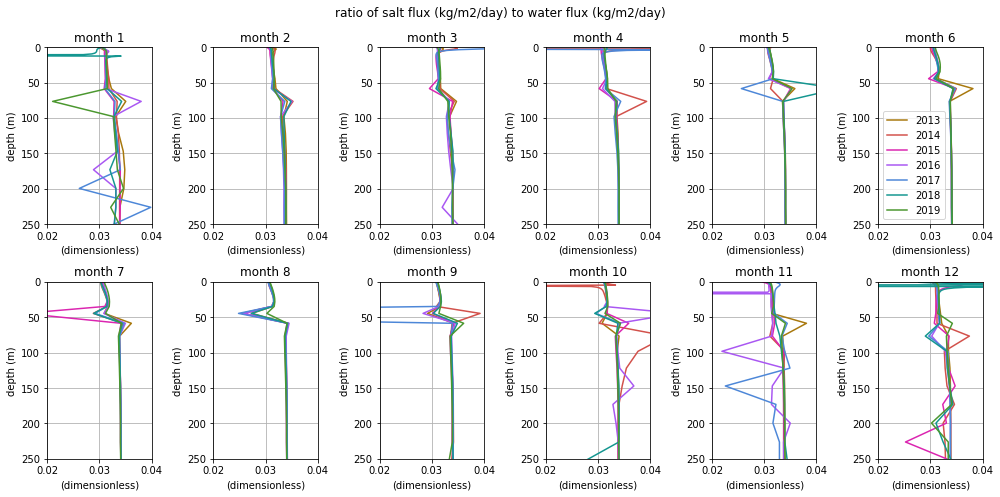

In [29]:
tcmap = cm.cm.phase
txmi = 0.02; txma =0.04
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(np.divide(sal_flux_stor_conc[y,:,i],phys_flux_stor_conc[y,:,i]),\
                    depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); 
    axs[i].axvline(x=0); axs[i].grid();    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("(dimensionless)")
    axs[i].set_ylabel('depth (m)')
axs[5].legend()

plt.suptitle('ratio of salt flux (kg/m2/day) to water flux (kg/m2/day)'); plt.tight_layout()


## Monthly depth-averaged T-S plots in the JdF slice
### spice and pot. dens. contours shown 

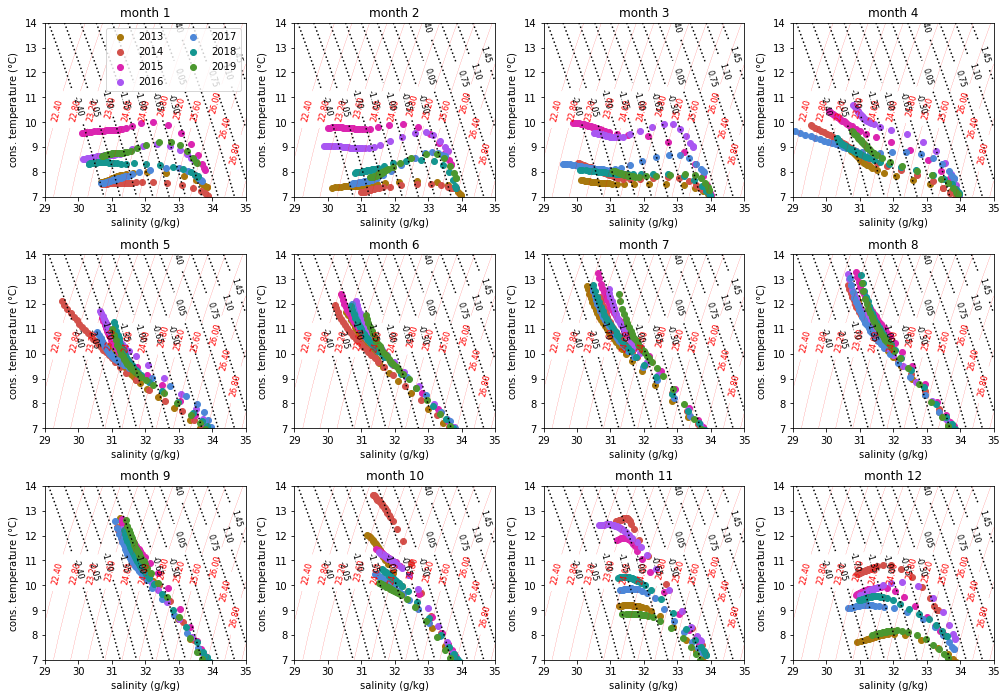

In [30]:
tcmap = cm.cm.phase
fact = 0.7
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


for i in range(0,12):    
    CS = axs[i].contour(si,ti,dens_1, np.arange(22.4,28,0.4),\
        linestyles='dashed', linewidths = 0.2,colors='r')
    CS1 = axs[i].contour(si,ti,spic_1,np.arange(-2.4,1.5,0.35),\
                         linestyles='dotted', colors='k')
    plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
    plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
    

    axs[i].set_title(f'month {i+1}')


for i in range(0,12):
    for y in range(0,7):
        axs[i].scatter(SAL_JDF_stor[y,:,i],TEMP_JDF_stor[y,:,i],\
                       color =tcmap(y/7), label = f'{y+2013}')
    axs[i].set_xlabel('salinity (g/kg)')
    axs[i].set_ylabel('cons. temperature ($\degree$C)')
    axs[0].legend(ncol = 2)    
    axs[i].set_ylim([7,14]); axs[i].set_xlim([29.0,35])

plt.tight_layout()



## potential density

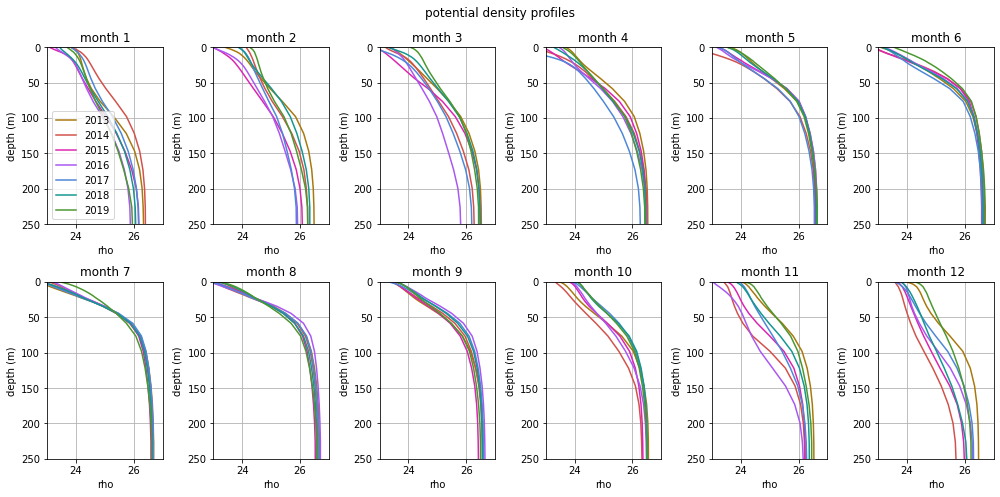

In [31]:
tcmap = cm.cm.phase
txmi = 23; txma =27
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(dens_stor[y,:,i]-1000,depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); axs[i].grid(); 
    #axs[i].axvline(x=0);    
    axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("rho")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('potential density profiles'); plt.tight_layout()


# spice

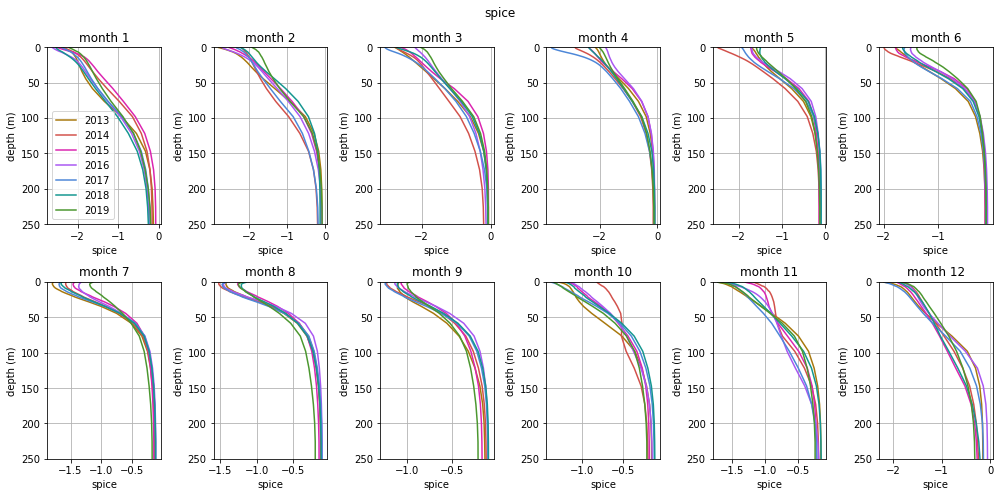

In [32]:
tcmap = cm.cm.phase
txmi = -2.5; txma =.1
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
fact = 0.7
fig, axs = plt.subplots(2,6, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    for y in range(0,7):
        axs[i].plot(spic_stor[y,:,i],depths, color = tcmap(y/7),label = f'{y+2013}')
    axs[i].set_ylim([0,250]); axs[i].invert_yaxis(); axs[i].grid(); 
    #axs[i].axvline(x=0);    
    #axs[i].set_xlim([txmi,txma]); 
    axs[i].set_title(f'month {i+1}')
    axs[i].set_xlabel("spice")
    axs[i].set_ylabel('depth (m)')
axs[0].legend()

plt.suptitle('spice'); plt.tight_layout()


In [33]:
SA = [34.7118, 34.8915, 35.0256, 34.8472, 34.7366, 34.7324]
CT = [28.8099, 28.4392, 22.7862, 10.2262,  6.8272,  4.3236]
sigma0 = gsw.sigma0(SA,CT)
print(sigma0)
SA = [34.7118, 34.8915, 35.0256, 34.8472, 34.7366, 34.7324]
CT = [28.8099, 28.4392, 22.7862, 10.2262,  6.8272,  4.3236]
zr = np.zeros_like(SA)
sigma0 = gsw.rho(SA,CT,zr)
print(sigma0-1000)
# sigma0 =
#   21.797900819337656
#   22.052215404397316
#   23.892985307893923
#   26.667608665972011
#   27.107380455119710
#   27.409748977090885

[21.79790082 22.0522154  23.89298531 26.66760867 27.10738046 27.40974898]
[21.79790082 22.0522154  23.89298531 26.66760867 27.10738046 27.40974898]


##

# spice vs density

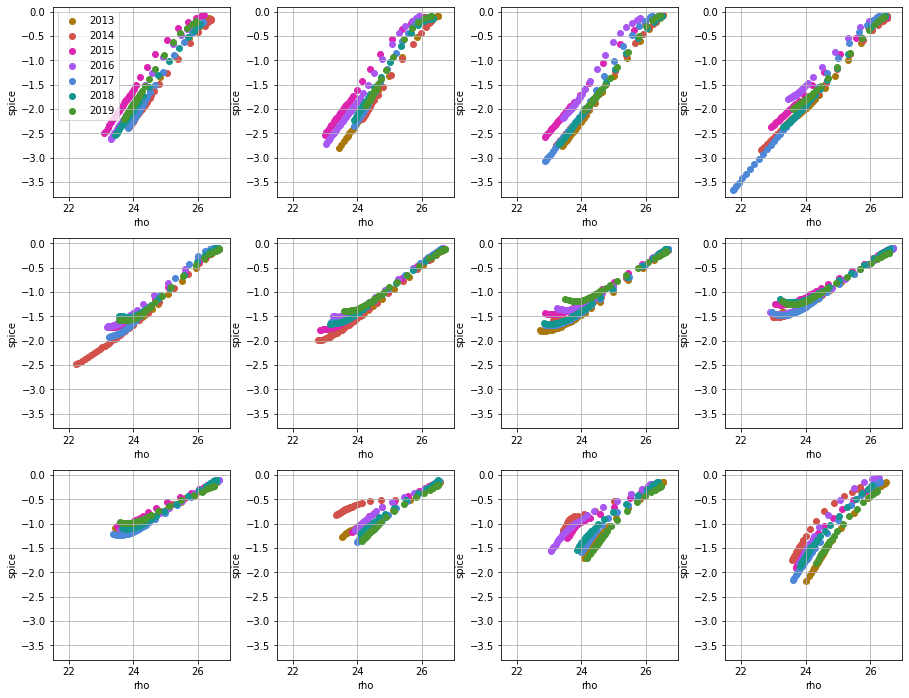

In [34]:
tcmap = cm.cm.phase
fact = 0.7
fig, axs = plt.subplots(3,4, figsize=(18*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



for i in range(0,12):
    for y in range(0,7):
        axs[i].scatter(dens_stor[y,:,i]-1000,spic_stor[y,:,i],\
                       color =tcmap(y/7), label = f'{y+2013}')
    axs[i].set_xlabel('rho')
    axs[i].set_ylabel('spice')
    axs[0].legend(loc = 2, ncol = 1); axs[i].grid()
    axs[i].set_ylim([-3.8,0.1]); axs[i].set_xlim([21.5,27])
    #axs[i].set_xticks([]);axs[i].set_yticks([]);

plt.tight_layout()



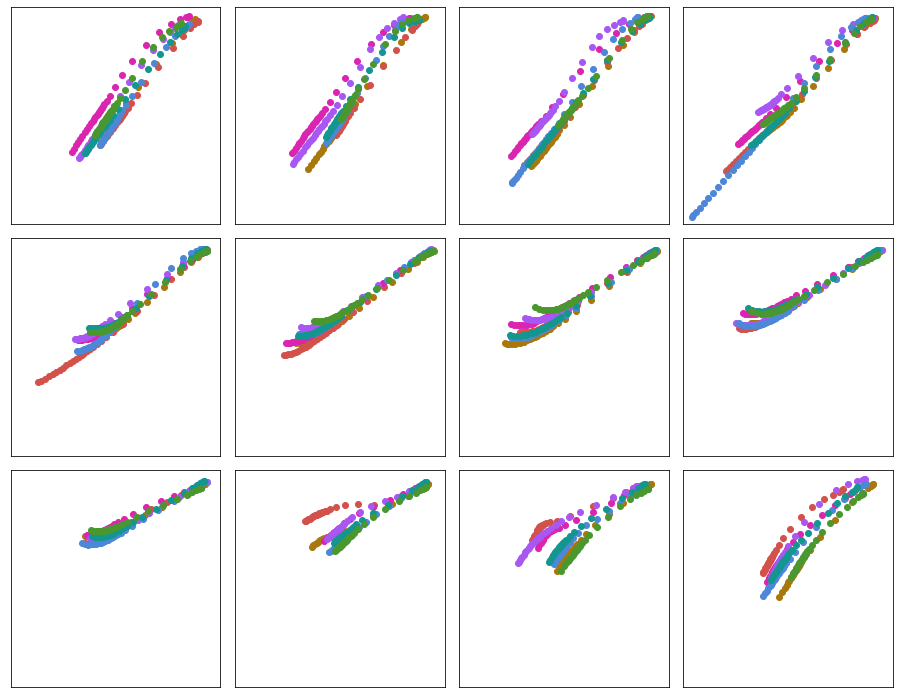

In [35]:
tcmap = cm.cm.phase
fact = 0.7
fig, axs = plt.subplots(3,4, figsize=(18*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


# for i in range(0,12):    
#     CS = axs[i].contour(si,ti,dens_1, np.arange(22.4,28,0.4),\
#         linestyles='dashed', linewidths = 0.2,colors='r')
#     CS1 = axs[i].contour(si,ti,spic_1,np.arange(-2.4,1.5,0.35),\
#                          linestyles='dotted', colors='k')
#     plt.clabel(CS, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
#     plt.clabel(CS1, fontsize=8, inline=1, fmt='%0.2f') # Label every second level
    

#     axs[i].set_title(f'month {i+1}')


for i in range(0,12):
    for y in range(0,7):
        axs[i].scatter(dens_stor[y,:,i]-1000,spic_stor[y,:,i],\
                       color =tcmap(y/7), label = f'{y+2013}')
#     axs[i].set_xlabel('salinity (g/kg)')
#     axs[i].set_ylabel('cons. temperature ($\degree$C)')
    #axs[0].legend(ncol = 2); axs[i].grid()
    axs[i].set_ylim([-3.8,0.1]); axs[i].set_xlim([21.5,27])
    axs[i].set_xticks([]);axs[i].set_yticks([]);

plt.tight_layout()

